In [3]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import lightgbm as lgb

Reading Train and Test Datasets

In [4]:
train=pd.read_csv(r"C:\Python_Projects\Titanic_Survival_Prediction\Datasets\train.csv")
test=pd.read_csv(r"C:\Python_Projects\Titanic_Survival_Prediction\Datasets\test.csv")

Exploratory Data Analysis


In [5]:
print(len(train.columns))

12


In [6]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


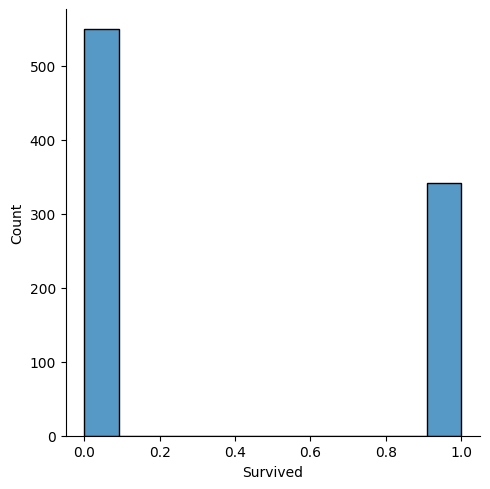

In [7]:
sns.displot(x='Survived',data=train)

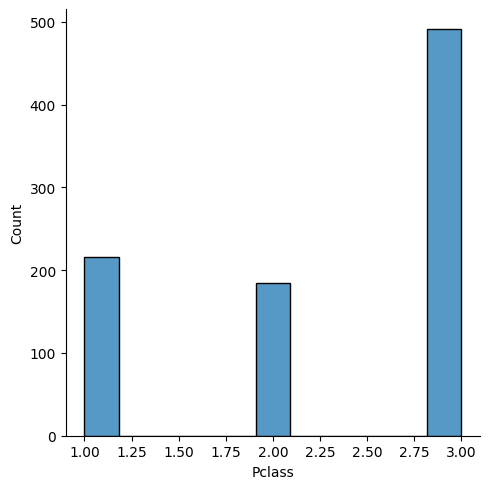

In [8]:
sns.displot(train['Pclass'])

<Axes: xlabel='Pclass', ylabel='Survived'>

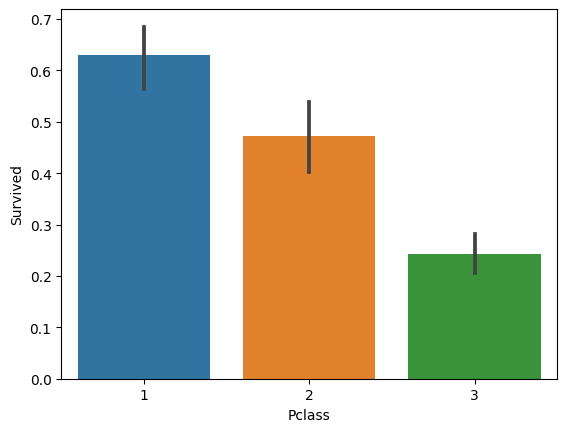

In [9]:
sns.barplot(x=train['Pclass'],y=train['Survived'])

<Axes: xlabel='Pclass', ylabel='Fare'>

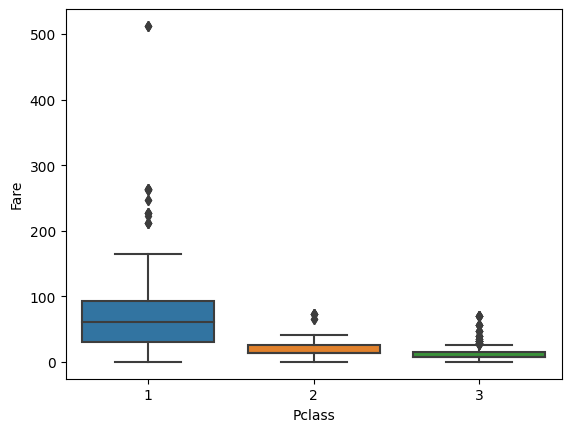

In [10]:
sns.boxplot(x=train['Pclass'],y=train['Fare'])

<Axes: xlabel='Sex', ylabel='Survived'>

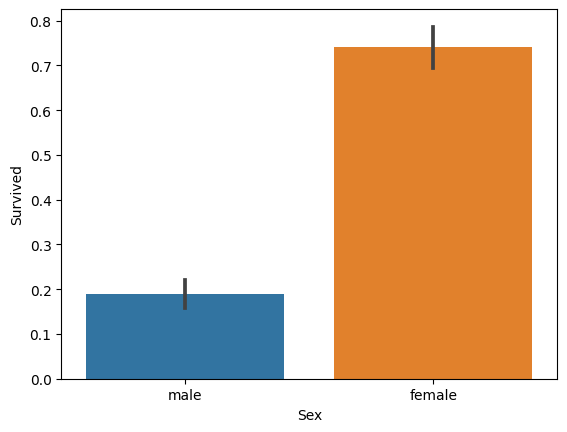

In [11]:
sns.barplot(x=train['Sex'],y=train['Survived'])

<Axes: >

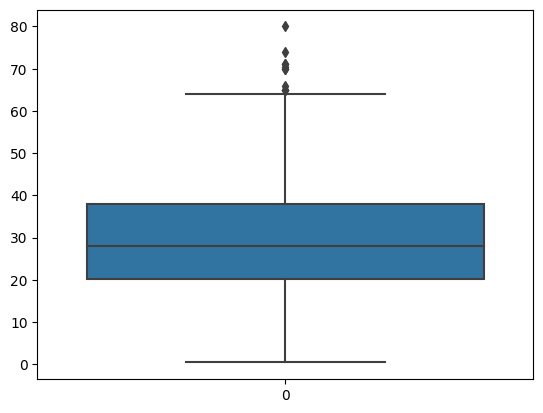

In [12]:
sns.boxplot(train['Age'])

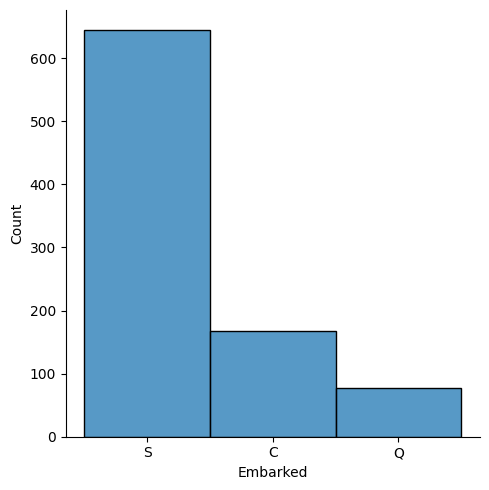

In [13]:
sns.displot(train['Embarked'])

In [14]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

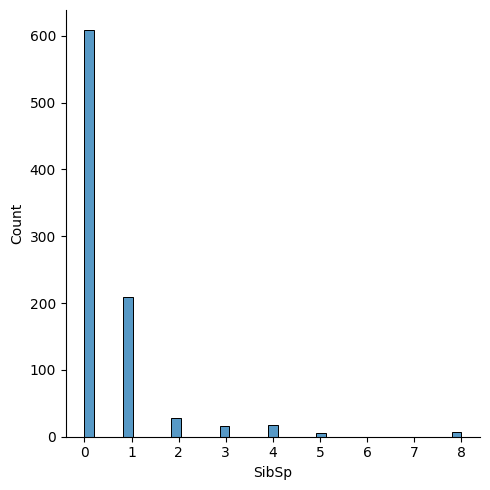

In [15]:
sns.displot(train['SibSp'])

Missing Value Treatment

In [16]:
print(round((pd.isnull(train).sum()/len(train))*100,2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [17]:
print(train['Age'].head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [18]:
print(train['Age'].mean(),train['Age'].median())

29.69911764705882 28.0


In [19]:
print(train['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [20]:
train['Age'].fillna(train['Age'].median(),inplace=True)
train['Embarked'].fillna('S',inplace=True)
train.drop(columns=['Cabin','PassengerId','Ticket','Name'],inplace=True)


Categorical Encoding

In [21]:
train=pd.get_dummies(columns=['Sex','Embarked'],data=train)

Model Building

In [22]:
X=train.drop(columns=['Survived'])
y=train['Survived']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [24]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [25]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.364407	valid_0's binary_logloss: 0.409983
[40]	training's binary_logloss: 0.288742	valid_0's binary_logloss: 0.386965
[60]	training's binary_logloss: 0.244261	valid_0's binary_logloss: 0.387623
[80]	training's binary_logloss: 0.211009	valid_0's binary_logloss: 0.399927
[100]	training's binary_logloss: 0.187081	valid_0's binary_logloss: 0.409317


c:\Users\hp\anaconda3\envs\titanic\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [26]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9312
Testing accuracy 0.8237


In [27]:
import sys
print(os.getcwd())

c:\Python_Projects\Titanic_Survival_Prediction\Notebooks
